In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn import linear_model
import datetime as dt
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
%matplotlib inline

In [66]:
df_flights = pd.read_csv('flights.csv')


In [120]:
df_flights["date"] = pd.to_datetime(df_flights[["YEAR", "MONTH", "DAY"]],format='%Y-%m-%d')
#df_flights['date'] = pd.to_datetime(df_flights["date"], format='%Y-%m-%d')
df_active = df_flights[(df_flights.CANCELLED == 0) & (df_flights.DIVERTED == 0)]
#df_active["SCHEDULED_DEPARTURE"] = df_active.astype({'SCHEDULED_DEPARTURE':'int'})



In [96]:
df_airlines = pd.read_csv('airlines.csv')

In [98]:
df_merge = pd.merge(df_flights, df_airlines, how="left",left_on='AIRLINE', right_on='IATA_CODE')
df_merge.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,date,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,AS,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,AA,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,US,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,AA,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,AS,Alaska Airlines Inc.


In [68]:
df_active["Hour"] = df_active["SCHEDULED_DEPARTURE"]
df_active["Hour"] = df_active["Hour"].astype(int)

#df_active.head(5)
df_active["Hour"] = df_active["Hour"].round(decimals=-2)
df_active.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,date,Hour
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,0


In [69]:
rounded = int(2345 / 100) * 100
rounded

2300

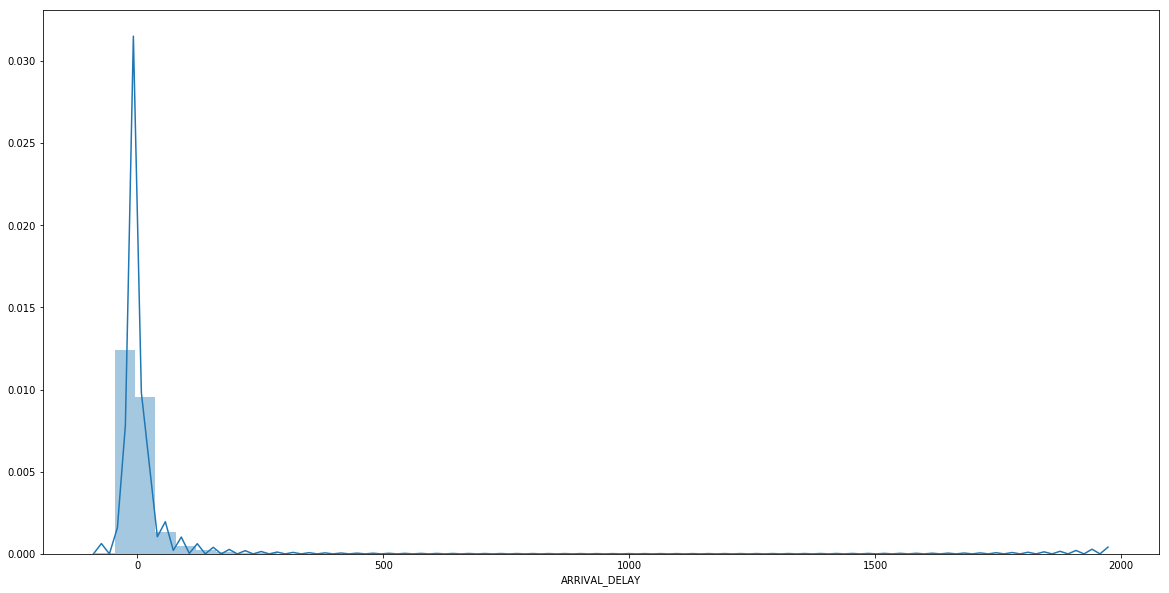

In [70]:
#ArrivalDelayfrequency
plt.figure(figsize=(20,10))
sns.distplot(df_active['ARRIVAL_DELAY']);


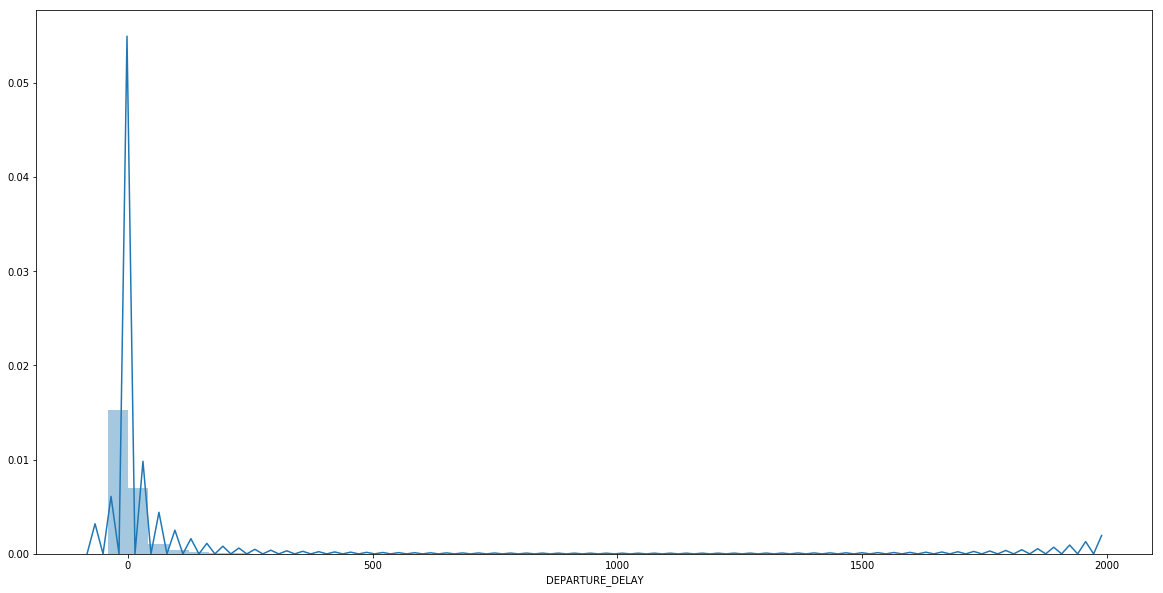

In [71]:
#DepartureDelayfrequency
plt.figure(figsize=(20,10))
sns.distplot(df_active['DEPARTURE_DELAY']);

<Figure size 1440x720 with 0 Axes>

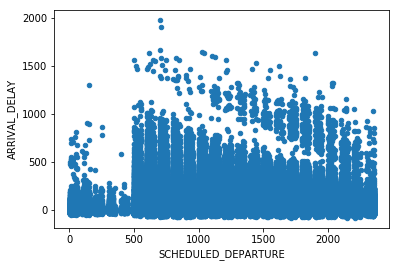

In [72]:
#Arrival Delay vs time of the day
plt.figure(figsize=(20,10))

df_active.plot.scatter(x="SCHEDULED_DEPARTURE", y='ARRIVAL_DELAY');

Text(0,0.5,'Average Hourly Delay (mins)')

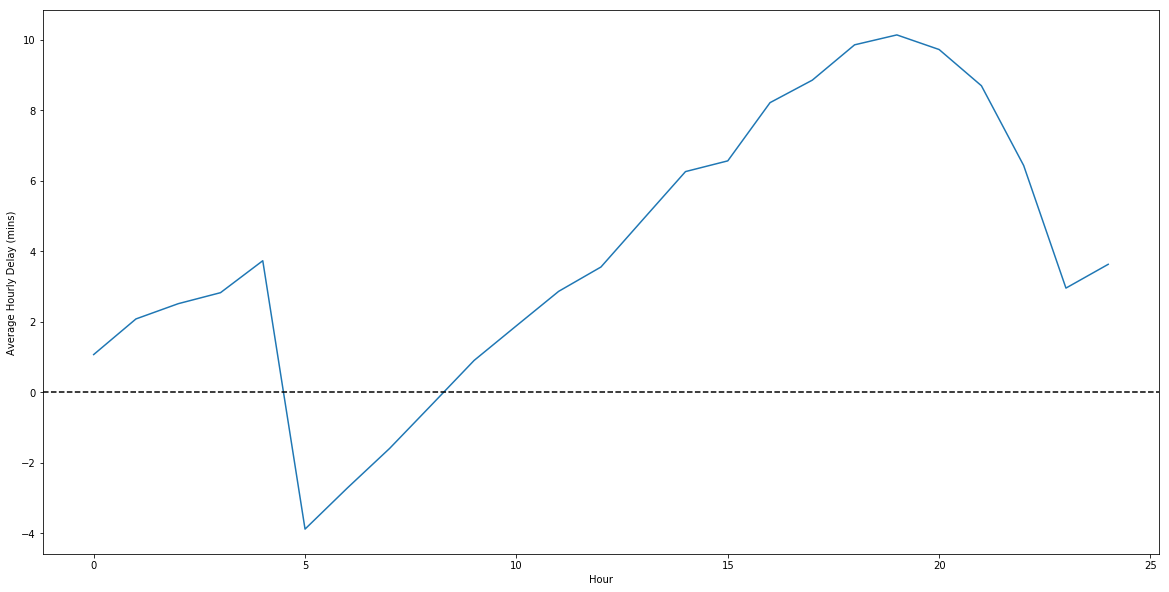

In [73]:
#Avg Hourly delay in mins
df_hourly = df_active.groupby("Hour")["ARRIVAL_DELAY"].mean()


df_hour_arrive= pd.DataFrame()

df_hour_arrive["ARRIVAL_DELAY"]=df_hourly[:]
df_hour_arrive.reset_index(inplace=True)
df_hour_arrive["Hour"]=df_hour_arrive["Hour"]/100
df_hour_arrive.head(5)
plt.figure(figsize=(20,10))

plt.plot(df_hour_arrive["Hour"],df_hour_arrive["ARRIVAL_DELAY"])
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel("Hour")
plt.ylabel("Average Hourly Delay (mins)")

<Figure size 1440x720 with 0 Axes>

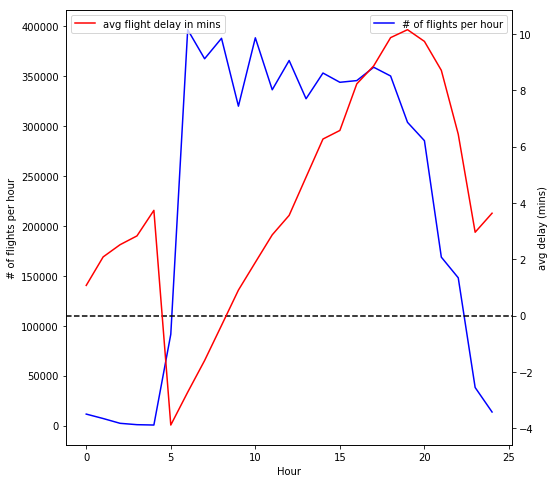

In [74]:
#Average Hourly Delay vs # of flights per hour
df_hourlyx = df_active.groupby("Hour")["ARRIVAL_DELAY"].count()
df_hourlyn= pd.DataFrame()
df_hourlyn["ARRIVAL_DELAY"]=df_hourlyx[:]
df_hourlyn.reset_index(inplace=True)
df_hourlyn["Hour"]=df_hourlyn["Hour"]/100
plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.set_xlabel("Hour")
ax1.set_ylabel("# of flights per hour")
ax2.set_ylabel("avg delay (mins)")
plt.axhline(y=0, color='black', linestyle='--')

ax1.plot(df_hourlyn["Hour"],df_hourlyn["ARRIVAL_DELAY"],color="blue",label="# of flights per hour")
ax2.plot(df_hour_arrive["Hour"],df_hour_arrive["ARRIVAL_DELAY"],color="red",label="avg flight delay in mins")
ax2.legend(loc=0)
ax1.legend(loc=0)





<Figure size 1440x720 with 0 Axes>

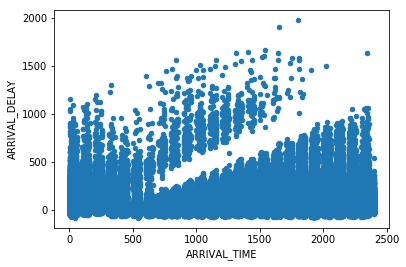

In [75]:
#Arrival Delay vs time of the day of Arrival
plt.figure(figsize=(20,10))
df_active.plot.scatter(x="ARRIVAL_TIME", y='ARRIVAL_DELAY');

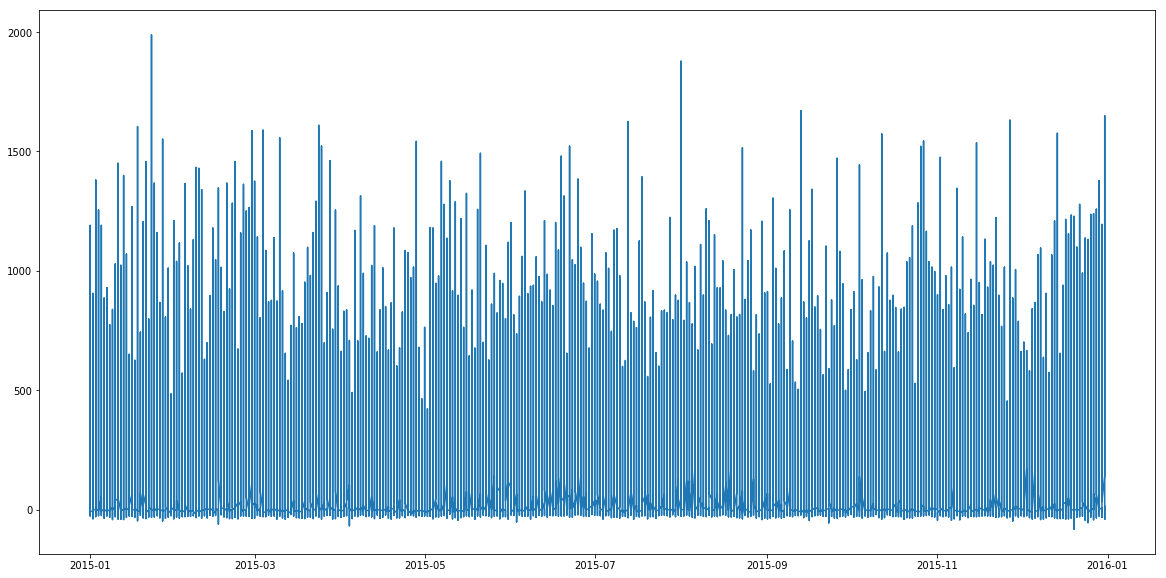

In [76]:
#Departure Delay frequency in 2015
plt.figure(figsize=(20,10))
plt.plot(df_active["date"], df_active["DEPARTURE_DELAY"])

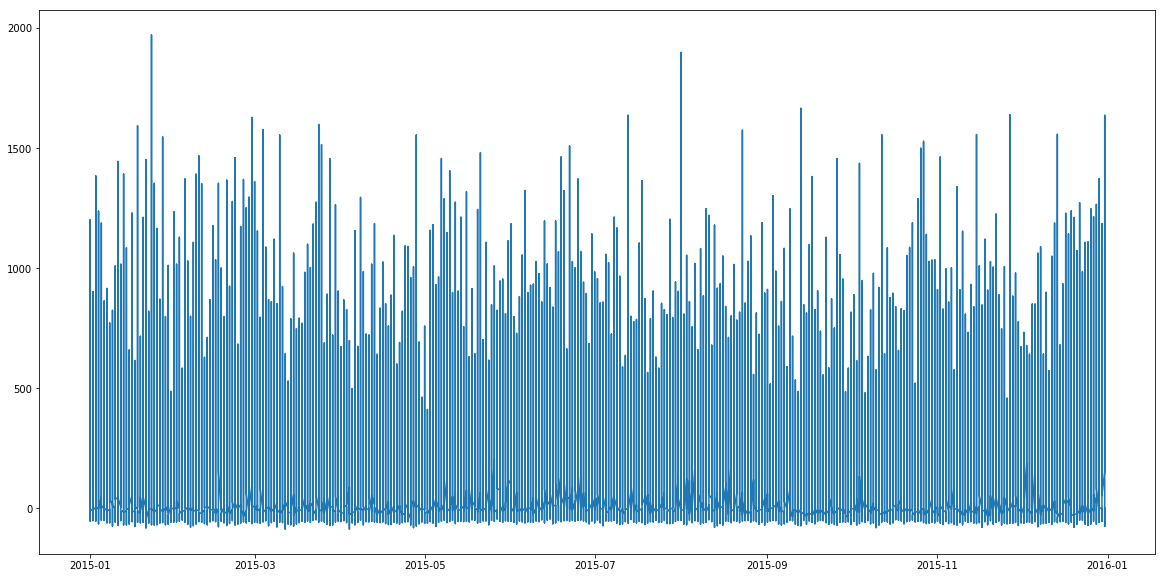

In [78]:
#Arrival Delay frequency in 2015
plt.figure(figsize=(20,10))
plt.plot(df_active["date"], df_active["ARRIVAL_DELAY"])

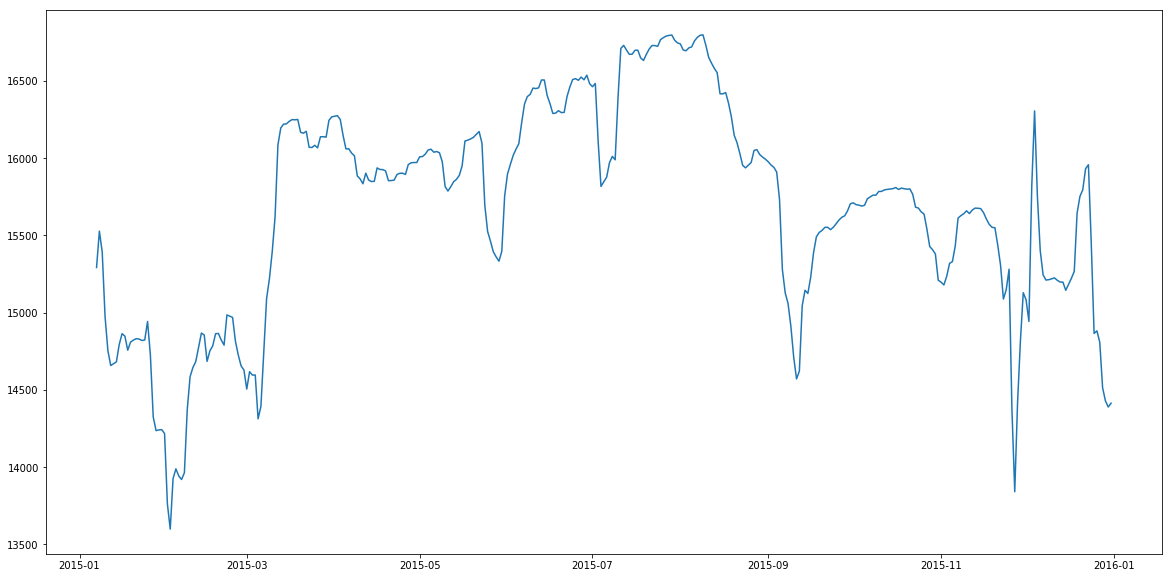

In [81]:
#Number of flights day in 2015 (weekly roling avg)
df_week_x = df_datex.rolling(window=7).mean() 
df_week_flights= pd.DataFrame()
#df_date["date"]=df_datex[0:]
df_week_flights["# of Flights"]=df_week_x[:]
df_week_flights.reset_index(inplace=True)
df_week_flights.head(5)

plt.figure(figsize=(20,10))
plt.plot(df_week_flights["date"],df_week_flights["# of Flights"])

Text(0,0.5,'Average Daily Delay')

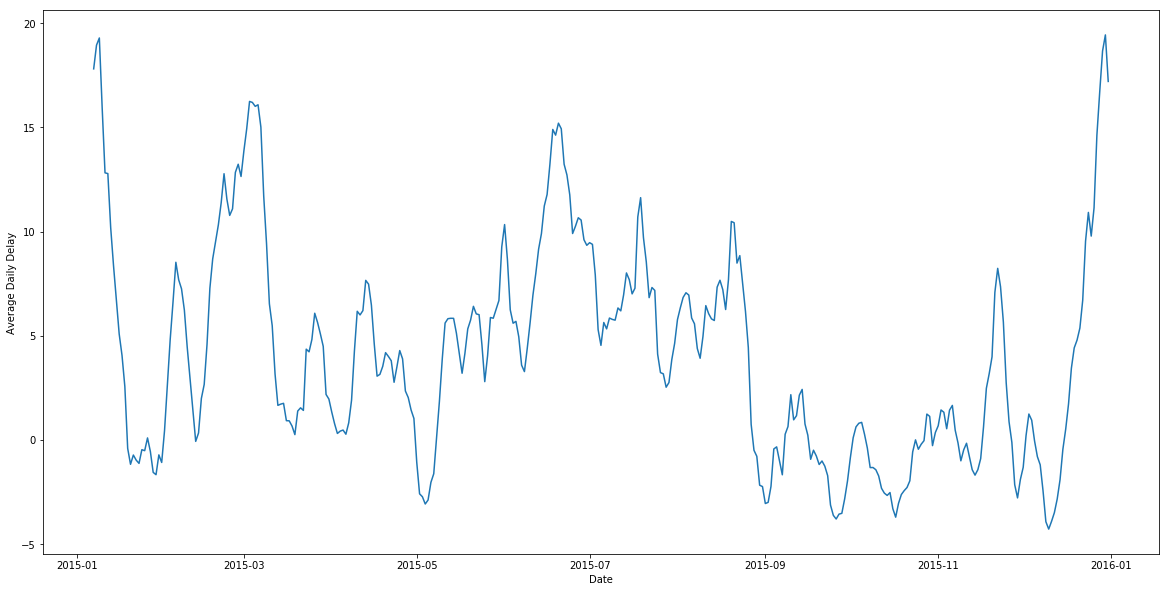

In [82]:
#Avg daily delay
df_week_a = df_datea.rolling(window=7).mean() 
df_week_arrive= pd.DataFrame()
#df_date["date"]=df_datex[0:]
df_week_arrive["ARRIVAL_DELAY"]=df_week_a[:]
df_week_arrive.reset_index(inplace=True)
df_week_arrive.head(5)

plt.figure(figsize=(20,10))
#fig, ax1 = plt.subplots(figsize=(8, 8))
#ax2 = ax1.twinx()

#ax1.plot(df_week_arrive["date"],df_week_arrive["ARRIVAL_DELAY"],color="red")
#ax2.plot(df_week_flights["date"],df_week_flights["# of Flights"]);
plt.plot(df_week_arrive["date"],df_week_arrive["ARRIVAL_DELAY"])
#plt.plot(df_week_flights["date"],df_week_flights["# of Flights"])
plt.xlabel("Date")
plt.ylabel("Average Daily Delay")

<Figure size 1440x720 with 0 Axes>

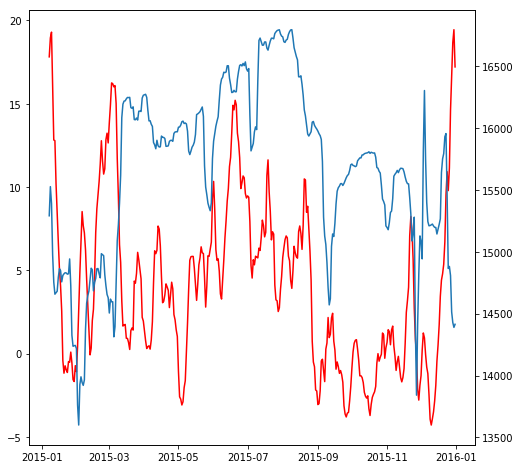

In [83]:
#ag daily delay vs # of flights per day
df_week_d = df_datea.rolling(window=7).mean() 
df_week_depart= pd.DataFrame()
#df_date["date"]=df_datex[0:]
df_week_depart["DEPARTURE_DELAY"]=df_week_d[:]
df_week_depart.reset_index(inplace=True)
df_week_depart.head(5)

plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(df_week_depart["date"],df_week_depart["DEPARTURE_DELAY"],color="red")
ax2.plot(df_week_flights["date"],df_week_flights["# of Flights"]);
#plt.plot(df_week_arrive["date"],df_week_arrive["ARRIVAL_DELAY"])
#plt.plot(df_week_flights["date"],df_week_flights["# of Flights"])

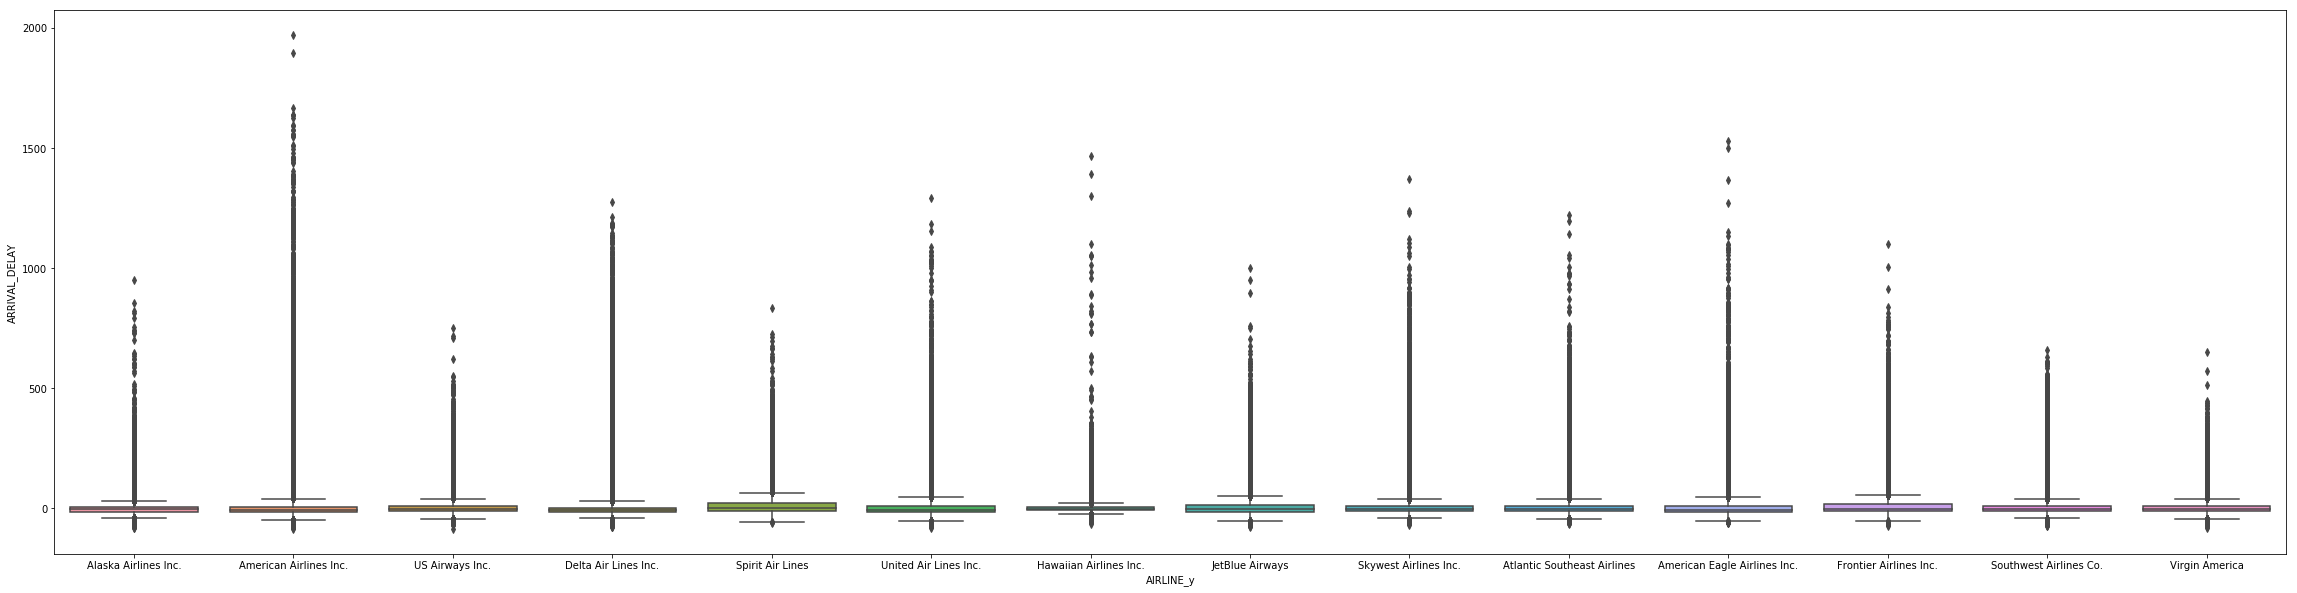

In [103]:
#Box plot of delay by airline
plt.figure(figsize=(40,10))
#plt.yscale('log')
#plt.ylim(-100, 100)
sns.boxplot( x=df_merge["AIRLINE_y"], y=df_merge["ARRIVAL_DELAY"] )
